# Load the Data set in to working directory

In [1]:
# Step 1: Install the Kaggle and KaggleHub libraries
# ------------------------------------------------------------------------------
# We use pip to install the necessary packages.
!pip install -q kaggle kagglehub torchinfo

#==============================================================================
#  Part 2: Download the 'Dermnet' dataset using KaggleHub and Save to Drive
# ==============================================================================
# We will use the modern kagglehub library to download the dataset.
# It downloads to a local cache, and then we'll copy it to Google Drive.

import kagglehub
import os
import shutil

print("Downloading 'Dermnet' dataset with kagglehub...")
# This downloads the dataset to a temporary cache location and returns the path.
# The files are automatically unzipped.
cached_path = kagglehub.dataset_download("shubhamgoel27/dermnet")
print(f"Dataset downloaded to cache: {cached_path}")

# Define the path in your Google Drive where you want to save the dataset
working_path = '/content/Skin_desease_classification/dermnet'

os.makedirs(working_path, exist_ok=True)

# Now, we copy the files from the cache to your persistent Google Drive folder.
print(f"Copying dataset from cache to your directory at: {working_path}")

# Define the required classes
required_classes = ["Nail Fungus and other Nail Disease",
"Hair Loss Photos Alopecia and other Hair Diseases",
"Melanoma Skin Cancer Nevi and Moles",
"Vasculitis Photos",
"Acne and Rosacea Photos",
"Scabies Lyme Disease and other Infestations and Bites"]
# Define the subdirectories within the cached path that contain the image classes
subdirs_to_copy_from = ["test", "train"]

for subdir in subdirs_to_copy_from:
    source_subdir_path = os.path.join(cached_path, subdir)
    destination_subdir_path = os.path.join(working_path, subdir)

    # Create the destination subdirectory
    os.makedirs(destination_subdir_path, exist_ok=True)

    if os.path.isdir(source_subdir_path):
        print(f"Processing subdirectory: {subdir}")
        # Loop through all items within the subdirectory
        for item in os.listdir(source_subdir_path):
            source_item = os.path.join(source_subdir_path, item)
            destination_item = os.path.join(destination_subdir_path, item)

            # Only copy if the item is a directory and is in the required_classes list
            if os.path.isdir(source_item) and item in required_classes:
                print(f"  Copying class: {item}")
                # Use copytree for directories
                shutil.copytree(source_item, destination_item, dirs_exist_ok=True)
            elif not os.path.isdir(source_item):
                 # Copy files (like metadata files) directly
                 shutil.copy2(source_item, destination_item)


print("\nSubset of Dataset successfully stored in your working directory!")

Dataset downloaded to cache: /kaggle/input/dermnet
Copying dataset from cache to your directory at: /content/Skin_desease_classification/dermnet
Processing subdirectory: test
  Copying class: Acne and Rosacea Photos
  Copying class: Hair Loss Photos Alopecia and other Hair Diseases
  Copying class: Melanoma Skin Cancer Nevi and Moles
  Copying class: Nail Fungus and other Nail Disease
  Copying class: Scabies Lyme Disease and other Infestations and Bites
  Copying class: Vasculitis Photos
Processing subdirectory: train
  Copying class: Acne and Rosacea Photos
  Copying class: Hair Loss Photos Alopecia and other Hair Diseases
  Copying class: Melanoma Skin Cancer Nevi and Moles
  Copying class: Nail Fungus and other Nail Disease
  Copying class: Scabies Lyme Disease and other Infestations and Bites
  Copying class: Vasculitis Photos

Subset of Dataset successfully stored in your working directory!


In [2]:
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4393, done.
remote: Total 4393 (delta 0), reused 0 (delta 0), pack-reused 4393 (from 1)
Receiving objects: 100% (4393/4393), 764.14 MiB | 31.57 MiB/s, done.
Resolving deltas: 100% (2657/2657), done.
Updating files: 100% (248/248), done.


In [3]:
import os
import shutil
from pathlib import Path


def create_subset_of_data(source_dir, destination_dir, num_images_per_class=200):

  # Create destination directory if it doesn't exist
  os.makedirs(destination_dir, exist_ok=True)

  # Loop through each class folder
  for class_folder in os.listdir(source_dir):
      source_class_path = os.path.join(source_dir, class_folder)
      dest_class_path = os.path.join(destination_dir, class_folder)

      # Only proceed if it is a directory
      if os.path.isdir(source_class_path):
          os.makedirs(dest_class_path, exist_ok=True)

          # List image files and take the first num_images_per_class
          image_files = [f for f in os.listdir(source_class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
          selected_images = image_files[:num_images_per_class]

          # Copy selected images
          for img_file in selected_images:
              src_path = os.path.join(source_class_path, img_file)
              dst_path = os.path.join(dest_class_path, img_file)
              shutil.copy(src_path, dst_path)

  print("✅ Subset creation completed successfully!")


In [4]:
# Source and destination paths for train data
source_dir = "/content/Skin_desease_classification/dermnet/train"
destination_dir = "/content/Skin_desease_classification/dermnet/sub_dermanet/train"

create_subset_of_data(source_dir, destination_dir, num_images_per_class=200)

✅ Subset creation completed successfully!


In [5]:
def get_files_list(data_path):

  classes=os.listdir(data_path)
  dic={}
  for i in classes:
      dic[i]= len(os.listdir(os.path.join(data_path,i)))
  print(f"{'=' * 10} Total Classes {len(dic.keys())} {'=' * 10} \n")
  for key,value in dic.items():
      print(key,":",value,"\n")
  return dic



In [6]:
_ = get_files_list(destination_dir)

========== Total Classes 6 ========== 

Melanoma Skin Cancer Nevi and Moles : 200 

Acne and Rosacea Photos : 200 

Nail Fungus and other Nail Disease : 200 

Scabies Lyme Disease and other Infestations and Bites : 200 

Hair Loss Photos Alopecia and other Hair Diseases : 200 

Vasculitis Photos : 200 



In [7]:
# Source and destination paths for train data
source_dir = "/content/Skin_desease_classification/dermnet/test"
destination_dir = "/content/Skin_desease_classification/dermnet/sub_dermanet/test"

create_subset_of_data(source_dir, destination_dir, num_images_per_class=20)

✅ Subset creation completed successfully!


In [8]:
_ = get_files_list(destination_dir)

========== Total Classes 6 ========== 

Melanoma Skin Cancer Nevi and Moles : 20 

Acne and Rosacea Photos : 20 

Nail Fungus and other Nail Disease : 20 

Scabies Lyme Disease and other Infestations and Bites : 20 

Hair Loss Photos Alopecia and other Hair Diseases : 20 

Vasculitis Photos : 20 



In [9]:
# Source and destination paths for train data
train_dir = "/content/Skin_desease_classification/dermnet/sub_dermanet/train"
test_dir = "/content/Skin_desease_classification/dermnet/sub_dermanet/test"



In [10]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [12]:
def set_seeds(seed: int=42):
    """Sets random sets for torch operations.

    Args:
        seed (int, optional): Random seed to set. Defaults to 42.
    """
    # Set the seed for general torch operations
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (ones that happen on the GPU)
    torch.cuda.manual_seed(seed)

In [13]:
# 1. Get pretrained weights for ViT-Base
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

# 2. Setup a ViT model instance with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

# 3. Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

# 4. Change the classifier head
class_names = required_classes

set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)
# pretrained_vit # uncomment for model output


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:02<00:00, 158MB/s]


In [14]:
from torchinfo import summary

# Print a summary using torchinfo (uncomment for actual output)
summary(model=pretrained_vit,
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 6]              768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

In [15]:
# Get automatic transforms from pretrained ViT weights
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [16]:
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int=NUM_WORKERS
):

  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(train_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)

  # Get class names
  class_names = train_data.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names

In [17]:
# Define data augmentation transforms for the training data
train_transforms_augmented = transforms.Compose([
    transforms.TrivialAugmentWide(), # This applies several common augmentations
    pretrained_vit_transforms, # Keep the original transforms (resize, crop, normalize)
])

# Create dataloaders with augmented training data
train_dataloader_augmented, test_dataloader_augmented, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=train_transforms_augmented, # Use augmented transforms for training
    batch_size=32
)

print("Dataloaders created with augmented training data.")

Dataloaders created with augmented training data.


In [18]:
train_dataloader_augmented.dataset

Dataset ImageFolder
    Number of datapoints: 1200
    Root location: /content/Skin_desease_classification/dermnet/sub_dermanet/train
    StandardTransform
Transform: Compose(
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ImageClassification(
               crop_size=[224]
               resize_size=[256]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BILINEAR
           )
           )

In [19]:
test_dataloader_augmented.dataset

Dataset ImageFolder
    Number of datapoints: 120
    Root location: /content/Skin_desease_classification/dermnet/sub_dermanet/test
    StandardTransform
Transform: Compose(
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ImageClassification(
               crop_size=[224]
               resize_size=[256]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BILINEAR
           )
           )

In [20]:
class_names

['Acne and Rosacea Photos',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Vasculitis Photos']

In [21]:
# Create optimizer and loss function
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the classifier head of the pretrained ViT feature extractor model
set_seeds()
pretrained_vit_results = engine.train(model=pretrained_vit,
                                      train_dataloader=train_dataloader_augmented,
                                      test_dataloader=test_dataloader_augmented,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=40,
                                      device=device)

  0%|          | 0/40 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.3546 | train_acc: 0.5025 | test_loss: 1.1218 | test_acc: 0.6016
Epoch: 2 | train_loss: 0.9514 | train_acc: 0.6521 | test_loss: 1.0538 | test_acc: 0.6042
Epoch: 3 | train_loss: 0.8584 | train_acc: 0.7122 | test_loss: 0.9183 | test_acc: 0.6927
Epoch: 4 | train_loss: 0.8134 | train_acc: 0.7113 | test_loss: 0.9086 | test_acc: 0.7031
Epoch: 5 | train_loss: 0.7329 | train_acc: 0.7459 | test_loss: 0.9660 | test_acc: 0.6536
Epoch: 6 | train_loss: 0.7127 | train_acc: 0.7599 | test_loss: 0.8592 | test_acc: 0.6823
Epoch: 7 | train_loss: 0.6655 | train_acc: 0.7771 | test_loss: 0.8417 | test_acc: 0.6979
Epoch: 8 | train_loss: 0.6461 | train_acc: 0.7887 | test_loss: 0.8166 | test_acc: 0.7135
Epoch: 9 | train_loss: 0.6250 | train_acc: 0.8002 | test_loss: 0.8301 | test_acc: 0.6771
Epoch: 10 | train_loss: 0.5892 | train_acc: 0.8084 | test_loss: 0.7726 | test_acc: 0.6901
Epoch: 11 | train_loss: 0.5989 | train_acc: 0.7977 | test_loss: 0.8566 | test_acc: 0.6953
Epoch: 12 | train_l

In [22]:
import matplotlib.pyplot as plt

def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

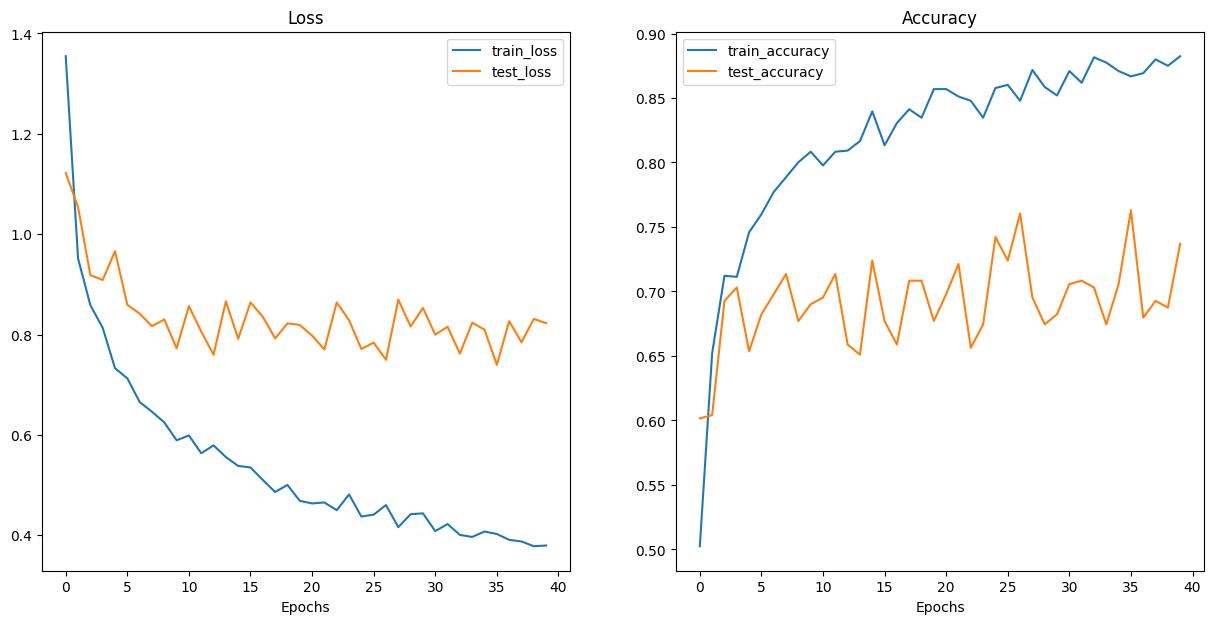

In [23]:
plot_loss_curves(pretrained_vit_results)


In [25]:
# Evaluate the model on the test dataset
pretrained_vit.eval()
with torch.no_grad():
    test_loss, test_acc = engine.test_step(model=pretrained_vit,
                                           dataloader=test_dataloader_augmented,
                                           loss_fn=loss_fn,
                                           device=device)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.8325, Test Accuracy: 0.7370
